## CAPSTONE PROJECT - REGRESSION

---



### IMPORT PACKAGES

In [2]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Statmodels
import statsmodels
import statsmodels.api as sm

### LOAD DATASET

In [4]:
# Mendefinisikan data path

path = '/content/gdrive/My Drive/SMT_6/GCollab DS-1/PROJEK MANDIRI/'

In [5]:
#cek direktory
os.listdir(path)

['DS_Study Case Capstone .pptx (1).pdf',
 'Superstore_.csv',
 'Template PPT.pptx',
 'Regression_Muklis_Ukhtia_Kusuma_Wardani.pptx',
 'Regression_Muklis_Ukhtia_Kusuma_Wardani.ipynb']

In [6]:
#load data
df = pd.read_csv(path + 'Superstore_.csv', encoding='latin1', sep =";")
df.head()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,419.136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.582
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,68.714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,25.164


### PROBLEM STATEMENT

Superstore adalah perusahaan yang bergerak
dibidang retail di Amerika. Meningkatnya permintaan dan persaingan ketat di pasar membuat Superstore ingin mengetahui informasi dari data yang dimiliki, untuk memahami apa yang terbaik untuk mereka. Studi kasus ini bertujuan untuk mengetahui hubungan produk, wilayah, kategori, dan segmen pelanggan mana yang harus mereka targetkan atau hindari dari revenue tahun 2014-2017


Meta Data Superstore_


1. Index = Indeks baris.
2. ID_pesanan = ID Pesanan Unik untuk setiap Pelanggan.
3. Tanggal_pesan = Tanggal Pemesanan produk.
4. Tanggal_kirim = Tanggal Pengiriman Produk.
5. Metode_pengiriman = Mode Pengiriman ditentukan oleh Pelanggan.
6. ID_pelanggan = ID unik untuk mengidentifikasi setiap Pelanggan.
7. Nama_pelanggan = Nama Pelanggan.
8. Segmen_pelanggan = Segmen tempat Pelanggan berada.
9. Kota = Kota tempat tinggal Pelanggan.
10. Negara = Negara tempat tinggal Pelanggan.
11. Kode_pos = Kode Pos setiap Pelanggan.
12. Wilayah = Wilayah tempat Pelanggan berada.
13. ID_produk = ID Unik Produk.
14. Kategori = Kategori produk yang dipesan.
15. Sub_kategori = Sub-Kategori produk yang dipesan.
16. Nama_produk = Nama Produk
17. Penjualan = Penjualan Produk.
18. Kuantitas = Kuantitas Produk.
19. Discount = Diskon yang disediakan.
20. Untung = Keuntungan penjualan


Analisis multiple linier regression menggunakan variabel independen (X) = Wilayah, Kategori, Sub_kategori, Segmen, Kuantitas, Discount, Untung

Sedangakan untuk variabel dependen (Y) = Penjualan



*   Kategori produk apa saja yang memerlukan perhatian lebih terhadap peningkatan nilai penjualan?
*   Banyaknya pembeli berada di wilayah mana saja?
*   Segmentasi pelanggan apa saja yang memiliki jumlah terbanyak membeli produk di wilayah tertentu?
*   Variabel apa yang paling berpengaruh terhadap peningkatan nilai penjualan produk di wilayah tertentu?
*   Model machine learning apa yang dapat membantu Superstore dalam memprediksi nilai penjualan dengan baik?



### EDA

#### Data Type

In [7]:
# Mendapatkan informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              9994 non-null   int64  
 1   ID_pesanan         9994 non-null   object 
 2   Tanggal_pesan      9994 non-null   object 
 3   Tanggal_kirim      9994 non-null   object 
 4   Metode_pengiriman  9994 non-null   object 
 5   ID_pelanggan       9994 non-null   object 
 6   Nama_pelanggan     9994 non-null   object 
 7   Segmen_pelanggan   9994 non-null   object 
 8   Kota               9994 non-null   object 
 9   Negara             9994 non-null   object 
 10  Kode_pos           9994 non-null   int64  
 11  Wilayah            9994 non-null   object 
 12  ID_produk          9994 non-null   object 
 13  Kategori           9994 non-null   object 
 14  Sub_kategori       9994 non-null   object 
 15  Nama_produk        9994 non-null   object 
 16  Penjualan          9994 

In [8]:
# Menampilkan dimensi dataset
df.shape

(9994, 20)

In [9]:
df['Tanggal_pesan'] = pd.to_datetime(df['Tanggal_pesan'], format='%m/%d/%Y')

In [10]:
# mengubah nilai pada kolom 'Penjualan' dan 'Untung' menjadi float
df['Penjualan'] = df['Penjualan'].str.replace('.', '').astype(float).round(2)
df['Untung'] = df['Untung'].str.replace('.', '').astype(float)

<ipython-input-10-5fbc4ac0d955>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Penjualan'] = df['Penjualan'].str.replace('.', '').astype(float).round(2)
<ipython-input-10-5fbc4ac0d955>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Untung'] = df['Untung'].str.replace('.', '').astype(float)


In [11]:
df.head()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196.0,2,0.00,419136.0
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.00,219582.0
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.00,68714.0
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.20,25164.0


In [12]:
# Menampilkan deskripsi dataset
df.describe()

,Index,Kode_pos,Penjualan,Kuantitas,Discount,Untung
count,9994.000000,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03
mean,4997.500000,55190.379428,1.132271e+05,3.789574,0.156203,1.800957e+05
std,2885.163629,32063.693350,5.186212e+05,2.225110,0.206452,1.722971e+06
min,1.000000,1040.000000,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,2499.250000,23223.000000,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,4997.500000,56430.500000,1.108800e+04,3.000000,0.200000,3.630900e+04
75%,7495.750000,90008.000000,5.399175e+04,5.000000,0.200000,1.509840e+05
max,9994.000000,99301.000000,2.396266e+07,14.000000,0.800000,6.719981e+07


In [13]:
# Mendapatkan informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Index              9994 non-null   int64         
 1   ID_pesanan         9994 non-null   object        
 2   Tanggal_pesan      9994 non-null   datetime64[ns]
 3   Tanggal_kirim      9994 non-null   object        
 4   Metode_pengiriman  9994 non-null   object        
 5   ID_pelanggan       9994 non-null   object        
 6   Nama_pelanggan     9994 non-null   object        
 7   Segmen_pelanggan   9994 non-null   object        
 8   Kota               9994 non-null   object        
 9   Negara             9994 non-null   object        
 10  Kode_pos           9994 non-null   int64         
 11  Wilayah            9994 non-null   object        
 12  ID_produk          9994 non-null   object        
 13  Kategori           9994 non-null   object        
 14  Sub_kate

In [14]:
# Cek tanggal minimum data
df['Tanggal_pesan'].min()

Timestamp('2014-01-03 00:00:00')

In [15]:
# Cek tanggal maksimum data
df['Tanggal_pesan'].max()

Timestamp('2017-12-30 00:00:00')

In [16]:
# Banyaknya produk pada 'Kategori'
df['Kategori'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Kategori, dtype: int64

<ipython-input-17-457756adec4a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Kategori')['Untung','Penjualan'].agg(['sum']).plot.bar()


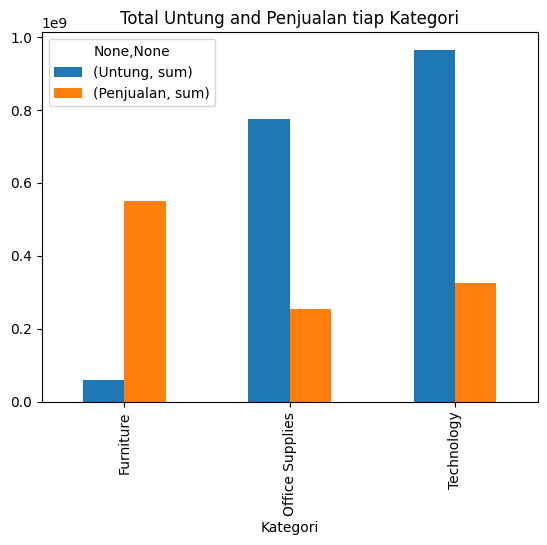

In [17]:
#Persebaran data antara Penjualan dengan Kategori
df.groupby('Kategori')['Untung','Penjualan'].agg(['sum']).plot.bar()
plt.title('Total Untung and Penjualan tiap Kategori')
plt.show()

Keuntungan tertinggi didapat pada kategori Technology, dan penjualan tertinggi didapat pada kategori Furniture

In [18]:
# Banyaknya produk pada 'Sub_kategori'
df['Sub_kategori'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub_kategori, dtype: int64

<ipython-input-19-d25e1c03b463>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub_kategori')['Untung','Penjualan'].agg(['sum']).plot.bar()


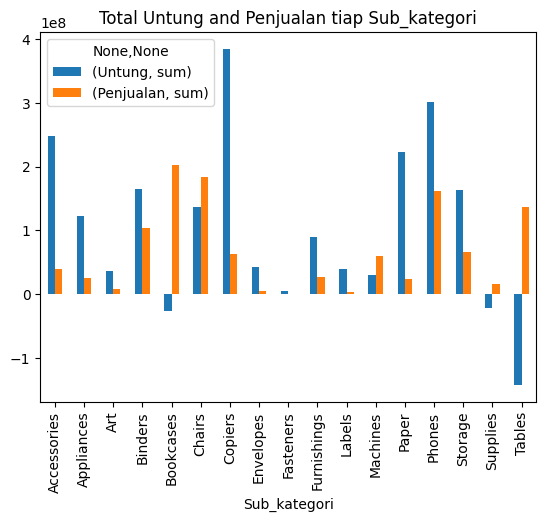

In [19]:
#Persebaran data antara Penjualan dengan Sub_kategori
df.groupby('Sub_kategori')['Untung','Penjualan'].agg(['sum']).plot.bar()
plt.title('Total Untung and Penjualan tiap Sub_kategori')
plt.show()

Sub_kategori produk yang banyak mendapat keuntungan adalah Copiers, sedangkan Sub_kategori Tables memiliki keuntungan terendah walaupun penjualannya lebih tinggi daripada Copiers.

In [20]:
# Mengurutkan DataFrame berdasarkan jumlah penjualan, kemudian memilih Sub_kategori produk teratas
top_produk = df.sort_values(by='Penjualan', ascending=False).head(5)

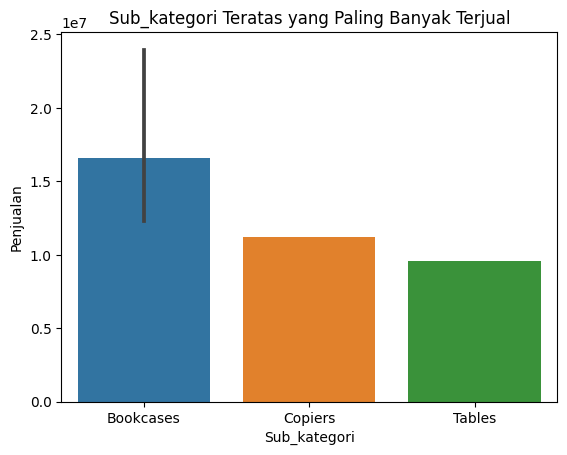

In [21]:
# Membuat barplot menggunakan library seaborn
sns.barplot(x='Sub_kategori', y='Penjualan', data=top_produk)
plt.title('Sub_kategori Teratas yang Paling Banyak Terjual')
plt.xlabel('Sub_kategori')
plt.ylabel('Penjualan')
plt.show()

In [22]:
# Mengurutkan DataFrame berdasarkan jumlah penjualan, kemudian memilih Sub_kategori produk terbawah
low_produk = df.sort_values(by='Penjualan', ascending=False).tail(5)

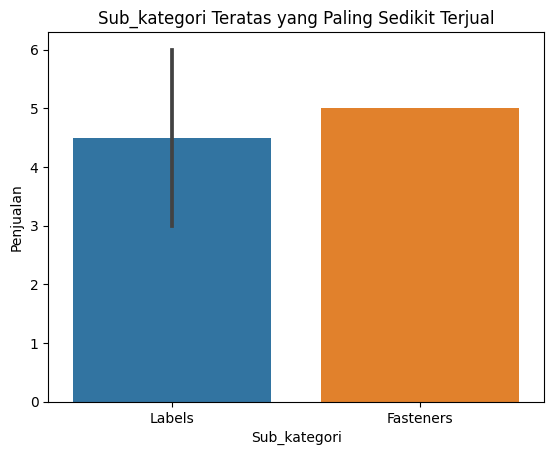

In [23]:
# Membuat barplot menggunakan library seaborn
sns.barplot(x='Sub_kategori', y='Penjualan', data=low_produk)
plt.title('Sub_kategori Teratas yang Paling Sedikit Terjual')
plt.xlabel('Sub_kategori')
plt.ylabel('Penjualan')
plt.show()


*   Sub_kategori produk teratas berdasarkan Penjualan yaitu : Bookcase, Copiers, Tables
*   Sub_kategori produk terbawah berdasarkan Penjualan yaitu : Labels, Fasteners

 

In [24]:
# Banyaknya produk pada 'Wilayah'
df['Wilayah'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Wilayah, dtype: int64

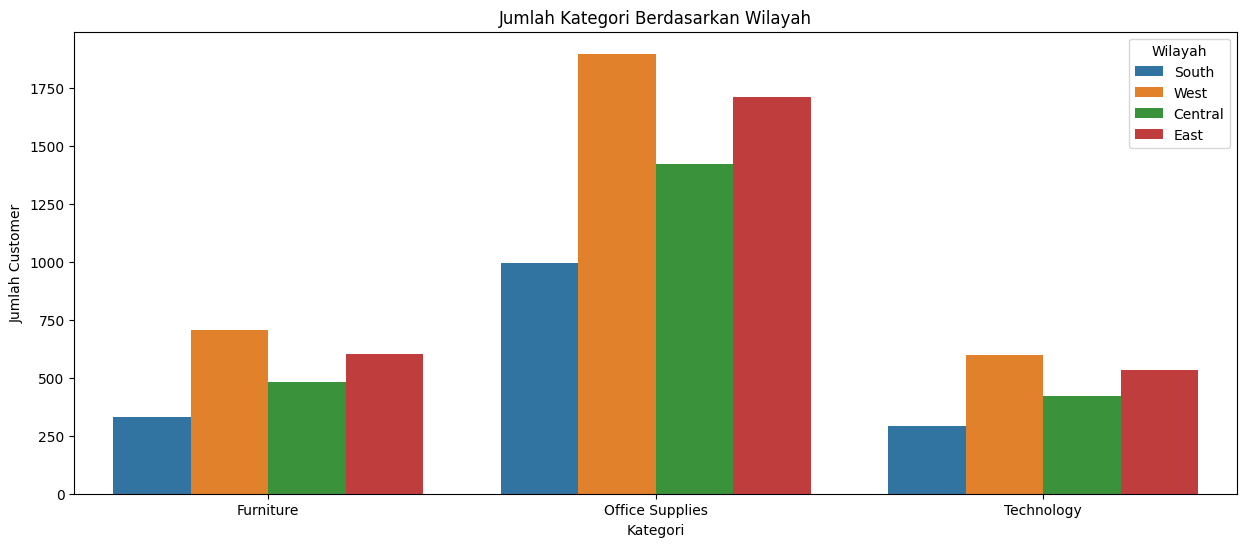

In [25]:
#Persebaran data antara Kategori dengan Wilayah
plt.figure(figsize=(15,6))
sns.countplot(x="Kategori", data=df, hue="Wilayah")
plt.title("Jumlah Kategori Berdasarkan Wilayah")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Customer")
plt.show()

Pembeli kategori Office Supplies paling banyak di wilayah West

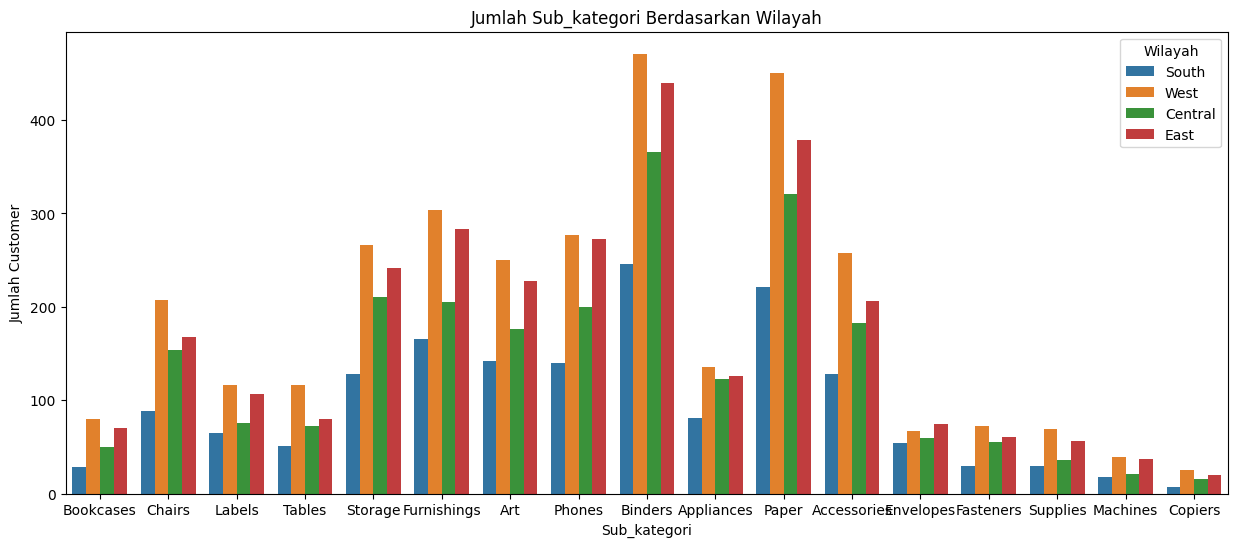

In [26]:
#Persebaran data antara Sub_kategori dengan Wilayah
plt.figure(figsize=(15,6))
sns.countplot(x="Sub_kategori", data=df, hue="Wilayah")
plt.title("Jumlah Sub_kategori Berdasarkan Wilayah")
plt.xlabel("Sub_kategori")
plt.ylabel("Jumlah Customer")
plt.show()

Pembeli Sub_kategori Binders paling banyak di wilayah West

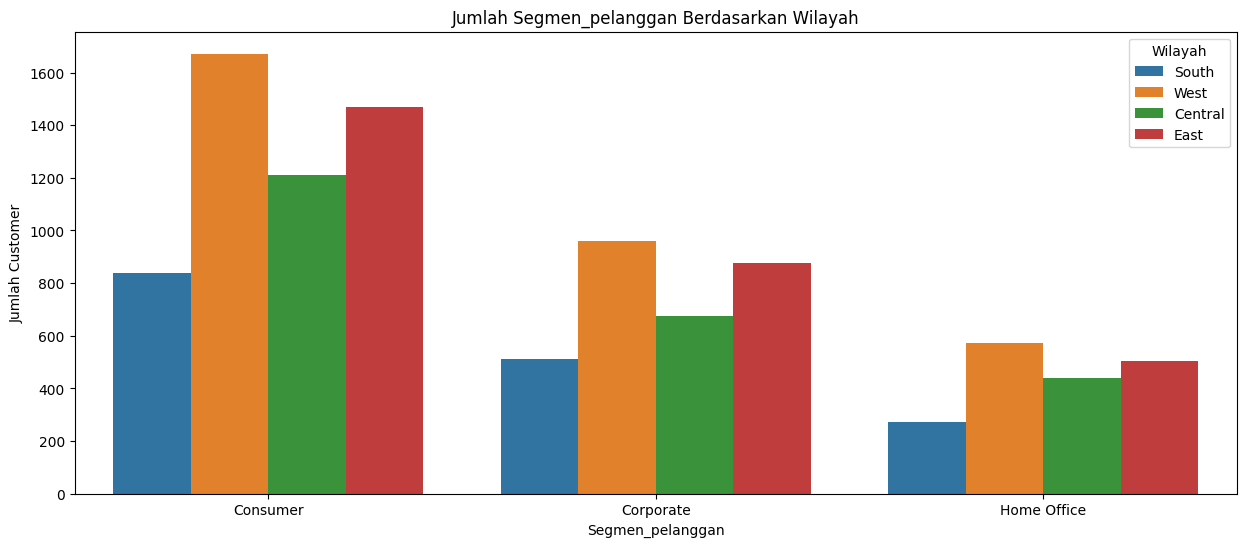

In [27]:
#Persebaran data antara Segmen_pelanggan dengan Wilayah
plt.figure(figsize=(15,6))
sns.countplot(x="Segmen_pelanggan", data=df, hue="Wilayah")
plt.title("Jumlah Segmen_pelanggan Berdasarkan Wilayah")
plt.xlabel("Segmen_pelanggan")
plt.ylabel("Jumlah Customer")
plt.show()

Segmen_pelanggan didominasi oleh Consumer di wilayah West

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

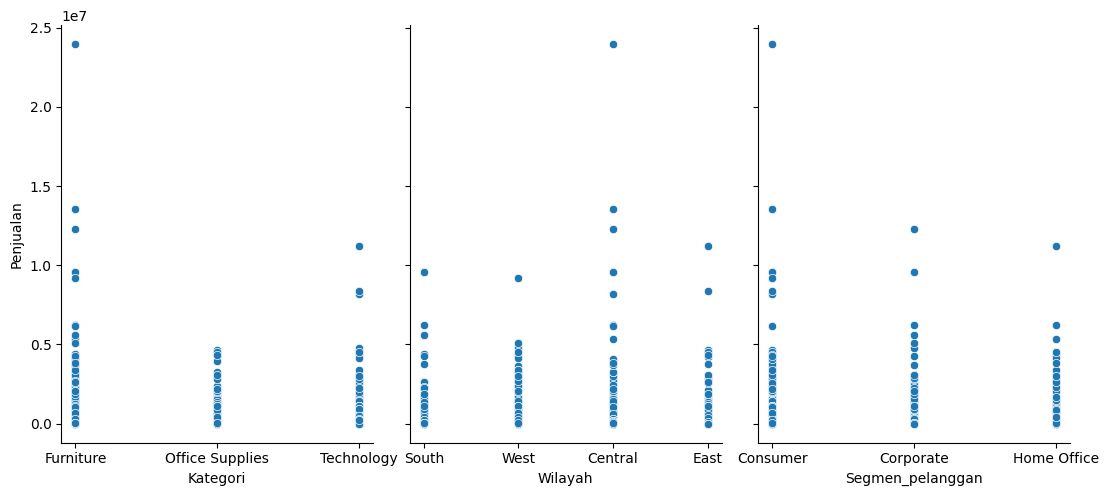

In [28]:
# Variasi antar variabel independen dan variabel dependen
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Kategori', 'Wilayah', 'Segmen_pelanggan'], y_vars=['Penjualan'], size=5, aspect=0.75)



*   penjualan tertinggi pada kategori furniture
*   penjualan tertinggi terjadi di wilayah central
*  penjualan tinggi didominasi oleh consumer


### DATA PRE-PROCESSING

In [29]:
# Drop variabel yang tidak diperlukan
df2 = df.drop(['Index','ID_pesanan', 'Tanggal_pesan', 'Tanggal_kirim', 'Metode_pengiriman', 'ID_pelanggan', 'Nama_pelanggan', 'Kota', 'Negara', 'Kode_pos', 'ID_produk', 'Nama_produk'], axis=1)
df2.head()

,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Penjualan,Kuantitas,Discount,Untung
0,Consumer,South,Furniture,Bookcases,26196.0,2,0.00,419136.0
1,Consumer,South,Furniture,Chairs,73194.0,3,0.00,219582.0
2,Corporate,West,Office Supplies,Labels,1462.0,2,0.00,68714.0
3,Consumer,South,Furniture,Tables,9575775.0,5,0.45,-383031.0
4,Consumer,South,Office Supplies,Storage,22368.0,2,0.20,25164.0


In [30]:
# Memeriksa jumlah missing value
df2.isnull().sum()

Segmen_pelanggan    0
Wilayah             0
Kategori            0
Sub_kategori        0
Penjualan           0
Kuantitas           0
Discount            0
Untung              0
dtype: int64

Diketahui bahwa tidak ada missing value yang terdeteksi

In [31]:
# Cek duplicate data
duplicate = df2[df2.duplicated()]
duplicate

,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Penjualan,Kuantitas,Discount,Untung
370,Consumer,Central,Office Supplies,Paper,2592.0,5,0.2,9396.0
595,Consumer,West,Technology,Copiers,1199976.0,3,0.2,4349913.0
797,Corporate,East,Office Supplies,Paper,1296.0,2,0.0,62208.0
813,Consumer,West,Furniture,Furnishings,1828.0,2,0.0,62152.0
845,Corporate,West,Office Supplies,Labels,1462.0,2,0.0,68714.0
...,...,...,...,...,...,...,...,...
9961,Home Office,Central,Office Supplies,Paper,65584.0,2,0.2,237742.0
9963,Consumer,East,Office Supplies,Paper,10368.0,2,0.2,36288.0
9975,Home Office,West,Office Supplies,Paper,1336.0,2,0.0,64128.0
9980,Consumer,South,Furniture,Tables,8598.0,1,0.0,223548.0


In [32]:
# menghilangkan duplicate value pada tabel
df2 = df2.drop_duplicates(subset=["Segmen_pelanggan",	"Wilayah", "Kategori", "Sub_kategori",	"Penjualan", "Kuantitas", "Discount","Untung"]).reset_index()

In [33]:
# Cek kembali apakah masih ada data duplicate 
df2[df2[["Segmen_pelanggan",	"Wilayah", "Kategori", "Sub_kategori",	"Penjualan", "Kuantitas", "Discount","Untung"]].duplicated(keep=False)].sort_values("Penjualan")

,index,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Penjualan,Kuantitas,Discount,Untung


Sudah tidak ada duplicate data

#### Outlier

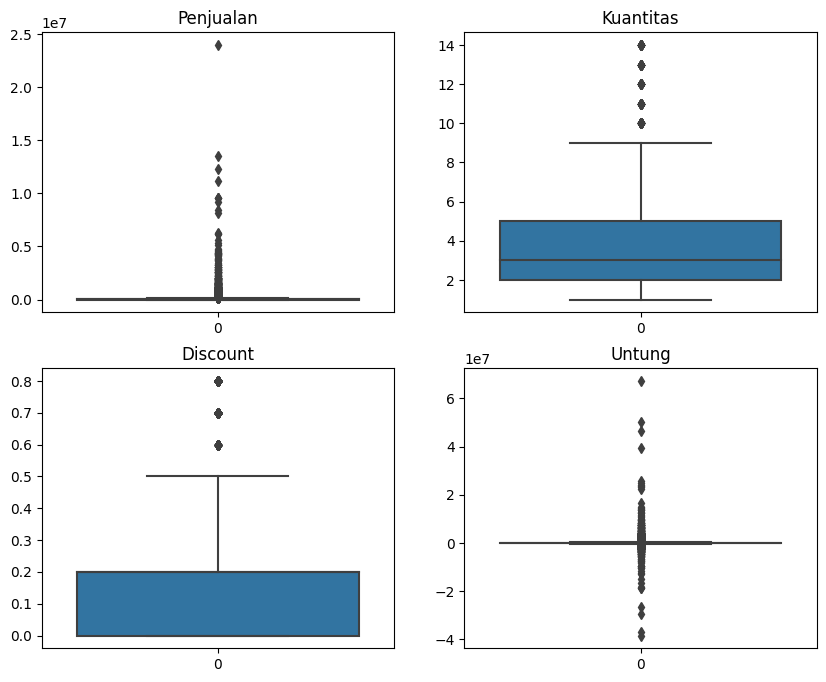

In [34]:
# Deteksi Outlier
fig, ax = plt.subplots (2, 2, figsize= (10, 8))

sns.boxplot(df["Penjualan"], ax=ax[0, 0])
ax[0,0].title.set_text('Penjualan')

sns.boxplot(df["Kuantitas"], ax=ax[0, 1])
ax[0,1].title.set_text('Kuantitas')

sns.boxplot(df["Discount"], ax=ax[1, 0])
ax[1,0].title.set_text('Discount')

sns.boxplot(df["Untung"], ax=ax[1, 1])
ax[1,1].title.set_text('Untung')
plt.show()

In [35]:
# Fungsi Pendeteksian Outlier Penjualan dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
penjualan_outliers = detect_outliers_iqr(df2['Penjualan'])
print("Outliers from IQR method: ", penjualan_outliers)

outliers = detect_outliers_iqr(list(df2.Penjualan))
print("Banyaknya outlier: ",len(outliers))

Outliers from IQR method:  [135984.0, 135996.0, 136396.0, 136464.0, 136784.0, 136784.0, 137352.0, 137992.0, 138588.0, 139424.0, 139495.0, 139554.0, 139944.0, 139993.0, 139993.0, 139998.0, 140376.0, 140392.0, 140686.0, 140736.0, 140736.0, 140736.0, 141372.0, 141372.0, 141552.0, 141576.0, 142182.0, 142488.0, 142776.0, 142776.0, 143128.0, 143432.0, 143728.0, 143856.0, 143856.0, 143928.0, 143952.0, 143952.0, 143976.0, 143976.0, 143982.0, 143992.0, 144396.0, 144765.0, 144784.0, 144882.0, 145449.0, 145544.0, 145568.0, 145764.0, 145764.0, 145764.0, 145865.0, 146136.0, 146176.0, 146352.0, 146352.0, 146352.0, 146352.0, 146544.0, 146688.0, 146688.0, 146952.0, 147168.0, 147184.0, 147184.0, 147184.0, 147184.0, 147196.0, 147568.0, 148257.0, 148288.0, 148704.0, 148704.0, 148704.0, 149232.0, 149352.0, 149352.0, 149544.0, 149616.0, 149995.0, 149997.0, 150325.0, 150384.0, 150408.0, 150452.0, 151056.0, 151188.0, 151192.0, 152656.0, 152688.0, 152991.0, 153552.0, 153552.0, 153568.0, 153584.0, 153584.0, 15

In [36]:
# Deleting outliers Penjualan
a = []
for j in list(df2.Penjualan):
    f = j in outliers
    if f is False:
        a.append(j)

In [37]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df2.Penjualan)))
print("Banyaknya data setelah diatasi outlier: ",len(a))
print("Median data setelah deleting: ",statistics.median(a))

Banyaknya data sebelum diatasi outlier:  9419
Banyaknya data setelah diatasi outlier:  8006
Median data setelah deleting:  7788.0


In [38]:
# Deleting outliers Kuantitas
b = []
for j in list(df2.Kuantitas):
    f = j in outliers
    if f is False:
        b.append(j)

In [39]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df2.Kuantitas)))
print("Banyaknya data setelah diatasi outlier: ",len(b))
print("Median data setelah deleting: ",statistics.median(b))

Banyaknya data sebelum diatasi outlier:  9419
Banyaknya data setelah diatasi outlier:  9419
Median data setelah deleting:  3


In [40]:
# Fungsi Pendeteksian Outlier Discount dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
diskon_outliers = detect_outliers_iqr(df2['Discount'])
print("Outliers from IQR method: ", diskon_outliers)

outliers = detect_outliers_iqr(list(df2.Discount))
print("Banyaknya outlier: ",len(outliers))

Outliers from IQR method:  [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.

In [41]:
# Deleting outliers Discount
c = []
for j in list(df2.Discount):
    f = j in outliers
    if f is False:
        c.append(j)

In [42]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df2.Discount)))
print("Banyaknya data setelah diatasi outlier: ",len(c))
print("Median data setelah deleting: ",statistics.median(c))

Banyaknya data sebelum diatasi outlier:  9419
Banyaknya data setelah diatasi outlier:  8576
Median data setelah deleting:  0.0


In [43]:
# Fungsi Pendeteksian Outlier Discount dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
untung_outliers = detect_outliers_iqr(df2['Untung'])
print("Outliers from IQR method: ", untung_outliers)

outliers = detect_outliers_iqr(list(df2.Untung))
print("Banyaknya outlier: ",len(outliers))

Outliers from IQR method:  [-38399904.0, -37018928.0, -29294845.0, -26399912.0, -18623124.0, -18509464.0, -18110784.0, -16650522.0, -14800335.0, -13065504.0, -12378462.0, -11812824.0, -10493406.0, -10315385.0, -10027836.0, -9688833.0, -9449946.0, -9359595.0, -8144832.0, -7860144.0, -7345264.0, -7299138.0, -6942936.0, -6599978.0, -6532834.0, -5719956.0, -5665625.0, -5536476.0, -5337325.0, -5256405.0, -5121468.0, -4802032.0, -4628624.0, -4599875.0, -4596072.0, -4581468.0, -4475947.0, -4375404.0, -4170936.0, -4126154.0, -3863916.0, -3847164.0, -3839904.0, -3779892.0, -3766932.0, -3749925.0, -3733048.0, -3569643.0, -3486294.0, -3471174.0, -3366272.0, -3202395.0, -3202395.0, -3191916.0, -3171528.0, -3120614.0, -3046653.0, -2998116.0, -2992614.0, -2976848.0, -2959785.0, -2929872.0, -2908752.0, -2693376.0, -2649208.0, -2639967.0, -2585016.0, -2557425.0, -2555875.0, -2534337.0, -2519958.0, -2519874.0, -2511864.0, -2505408.0, -2493216.0, -2482458.0, -2477988.0, -2314116.0, -2287782.0, -2287425.

In [44]:
# Deleting outliers Discount
d = []
for j in list(df2.Discount):
    f = j in outliers
    if f is False:
        d.append(j)

In [45]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df2.Untung)))
print("Banyaknya data setelah diatasi outlier: ",len(d))
print("Median data setelah deleting: ",statistics.median(d))

Banyaknya data sebelum diatasi outlier:  9419
Banyaknya data setelah diatasi outlier:  9419
Median data setelah deleting:  0.2


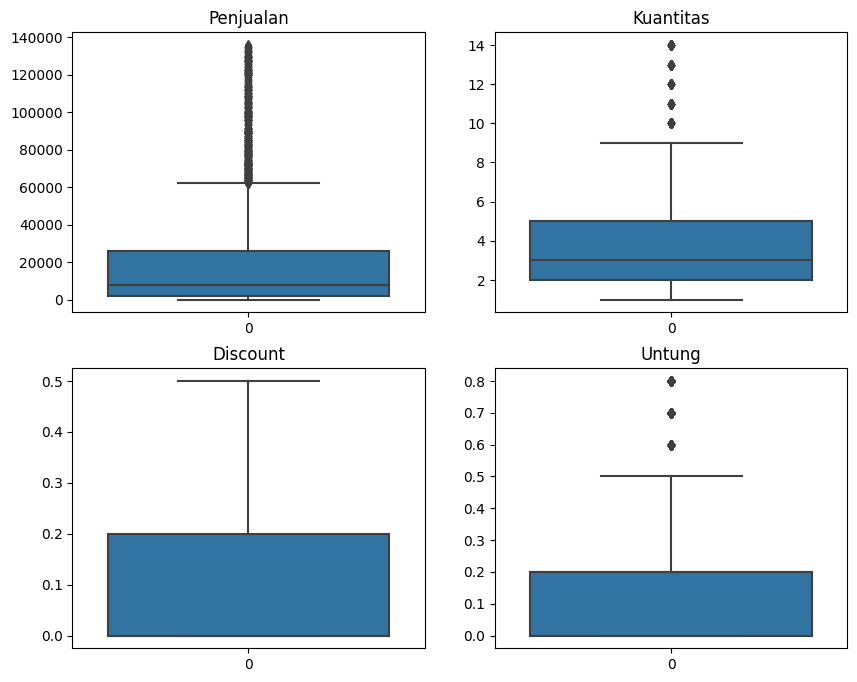

In [46]:
# Deteksi Outlier kembali
fig, ax = plt.subplots (2, 2, figsize= (10, 8))

sns.boxplot(a, ax=ax[0, 0])
ax[0,0].title.set_text('Penjualan')

sns.boxplot(b, ax=ax[0, 1])
ax[0,1].title.set_text('Kuantitas')

sns.boxplot(c, ax=ax[1, 0])
ax[1,0].title.set_text('Discount')

sns.boxplot(d, ax=ax[1, 1])
ax[1,1].title.set_text('Untung')
plt.show()

#### Encoding

In [47]:
df2.head(20)

,index,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Penjualan,Kuantitas,Discount,Untung
0,0,Consumer,South,Furniture,Bookcases,26196.0,2,0.00,419136.0
1,1,Consumer,South,Furniture,Chairs,73194.0,3,0.00,219582.0
2,2,Corporate,West,Office Supplies,Labels,1462.0,2,0.00,68714.0
3,3,Consumer,South,Furniture,Tables,9575775.0,5,0.45,-383031.0
4,4,Consumer,South,Office Supplies,Storage,22368.0,2,0.20,25164.0
5,5,Consumer,West,Furniture,Furnishings,4886.0,7,0.00,141694.0
6,6,Consumer,West,Office Supplies,Art,728.0,4,0.00,19656.0
7,7,Consumer,West,Technology,Phones,907152.0,6,0.20,907152.0
8,8,Consumer,West,Office Supplies,Binders,18504.0,3,0.20,57825.0
9,9,Consumer,West,Office Supplies,Appliances,1149.0,5,0.00,3447.0


In [48]:
kategori = ['Wilayah', 'Kategori', 'Sub_kategori', 'Segmen_pelanggan']
label_encoder = LabelEncoder()

for feature in kategori:
    if feature in df2.columns.values:
        df2[feature] = label_encoder.fit_transform(df2[feature])

df2.head()

,index,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Penjualan,Kuantitas,Discount,Untung
0,0,0,2,0,4,26196.0,2,0.00,419136.0
1,1,0,2,0,5,73194.0,3,0.00,219582.0
2,2,1,3,1,10,1462.0,2,0.00,68714.0
3,3,0,2,0,16,9575775.0,5,0.45,-383031.0
4,4,0,2,1,14,22368.0,2,0.20,25164.0


In [49]:
# Drop kolom index
df2 = df2.drop('index', axis=1)

In [50]:
df2.head()

,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Penjualan,Kuantitas,Discount,Untung
0,0,2,0,4,26196.0,2,0.00,419136.0
1,0,2,0,5,73194.0,3,0.00,219582.0
2,1,3,1,10,1462.0,2,0.00,68714.0
3,0,2,0,16,9575775.0,5,0.45,-383031.0
4,0,2,1,14,22368.0,2,0.20,25164.0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

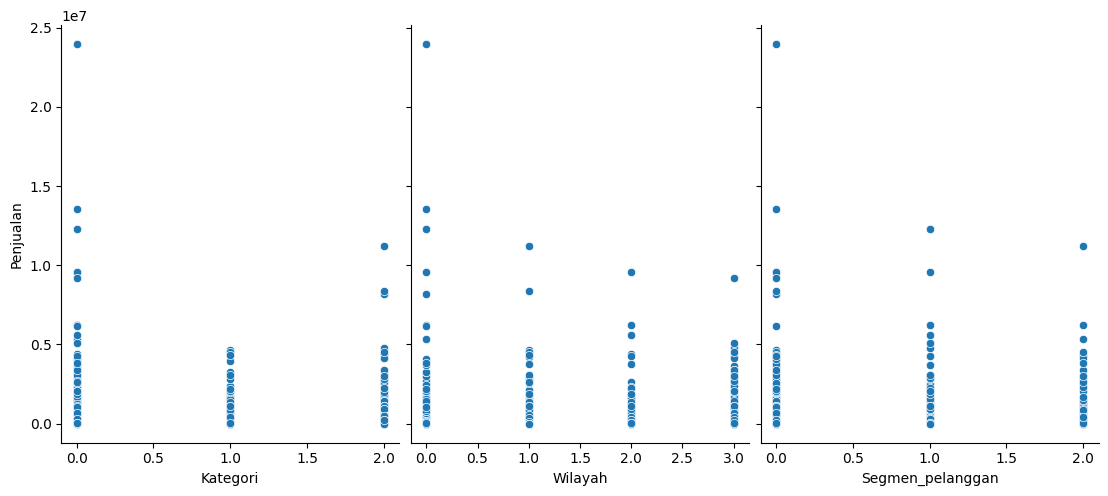

In [51]:
# Variasi antar variabel independen dan variabel dependen
plt.figure(figsize=(10,8))
sns.pairplot(data=df2, x_vars=['Kategori', 'Wilayah', 'Segmen_pelanggan'], y_vars=['Penjualan'], size=5, aspect=0.75)



*   penjualan tertinggi pada kategori furniture
*   penjualan tertinggi terjadi di wilayah central
*  penjualan tinggi didominasi oleh segmen consumer


### FEATURE ENGINEERING

#### Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

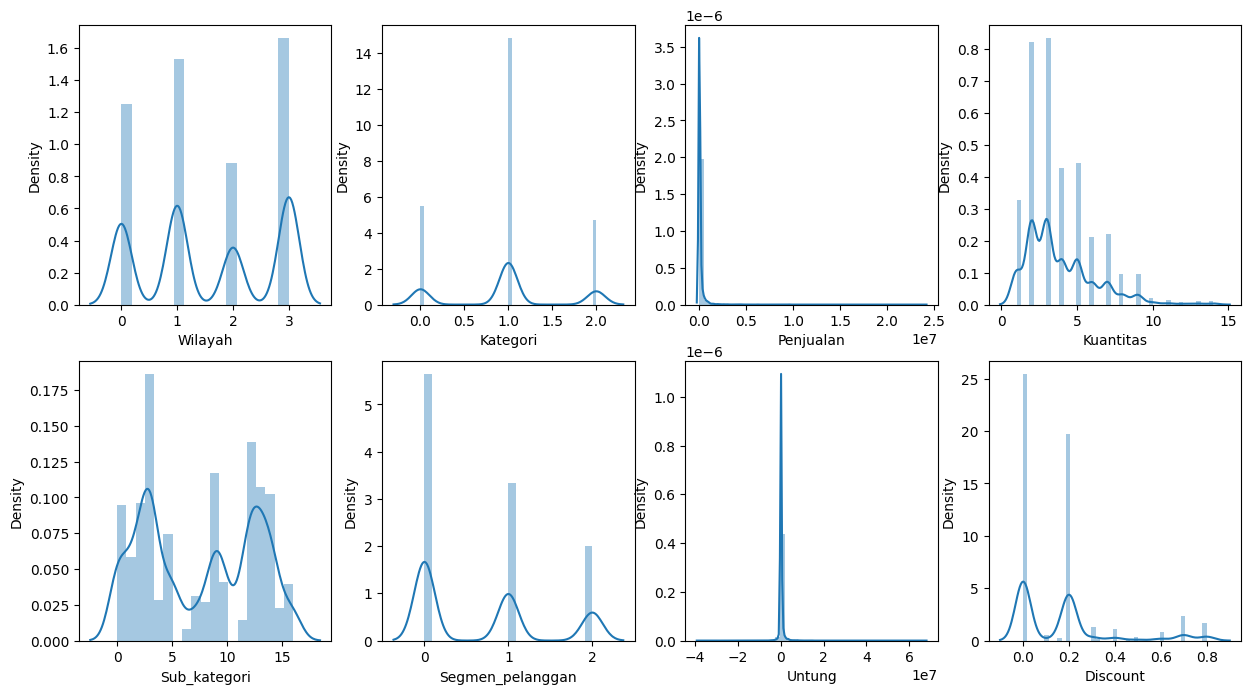

In [52]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

sns.distplot(df2["Wilayah"], ax=axes[0, 0])
sns.distplot(df2["Kategori"], ax=axes[0, 1])
sns.distplot(df2["Sub_kategori"], ax=axes[1, 0])
sns.distplot(df2["Segmen_pelanggan"], ax=axes[1, 1])
sns.distplot(df2["Penjualan"], ax=axes[0, 2])
sns.distplot(df2["Untung"], ax=axes[1, 2])
sns.distplot(df2["Kuantitas"], ax=axes[0, 3])
sns.distplot(df2["Discount"], ax=axes[1, 3])

plt.show()

In [53]:
# Uji Shapiro-Wilk
from scipy.stats import shapiro


In [54]:
column = df2.columns
for i in column:
  stat, p = shapiro(df2 [i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.750, p=0.000
Tolak H0, Segmen_pelanggan tidak berdistribusi normal
Statistics=0.837, p=0.000
Tolak H0, Wilayah tidak berdistribusi normal
Statistics=0.786, p=0.000
Tolak H0, Kategori tidak berdistribusi normal
Statistics=0.907, p=0.000
Tolak H0, Sub_kategori tidak berdistribusi normal
Statistics=0.181, p=0.000
Tolak H0, Penjualan tidak berdistribusi normal
Statistics=0.887, p=0.000
Tolak H0, Kuantitas tidak berdistribusi normal
Statistics=0.715, p=0.000
Tolak H0, Discount tidak berdistribusi normal
Statistics=0.217, p=0.000
Tolak H0, Untung tidak berdistribusi normal


#### Uji Linearitas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

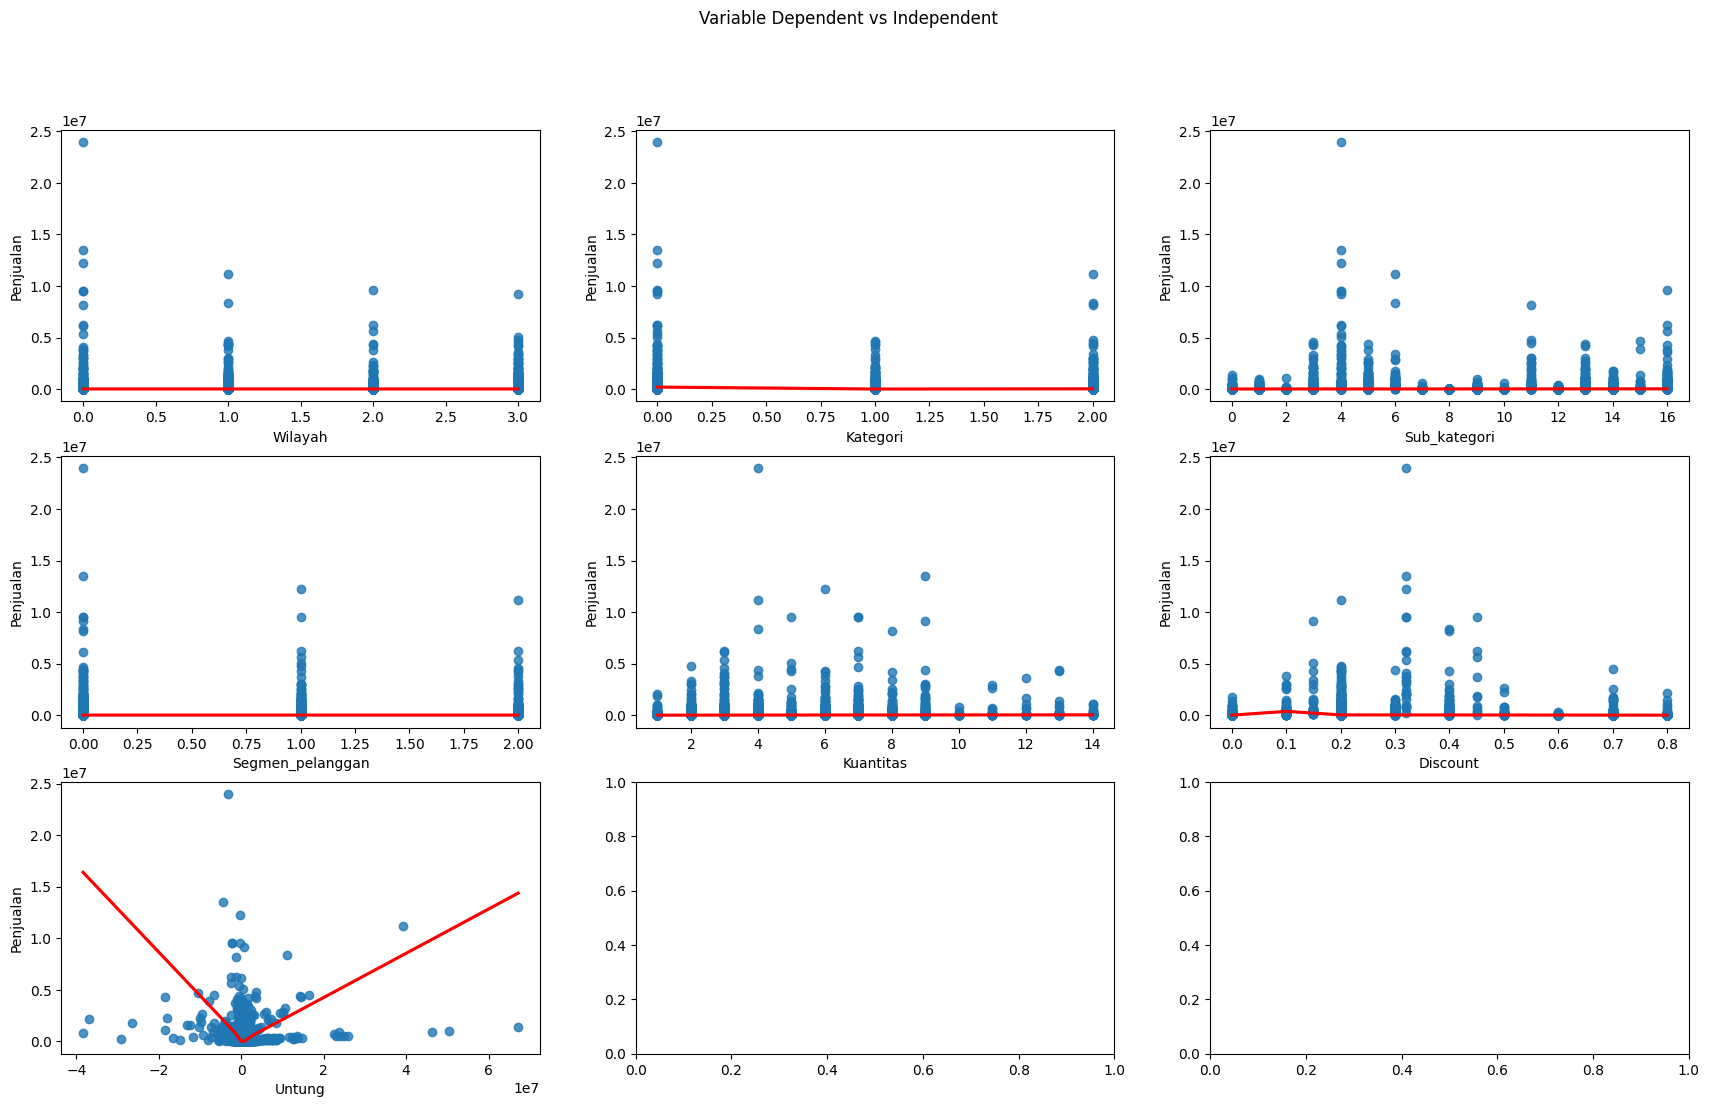

In [55]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(3, 3, figsize=(21, 12))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df2["Wilayah"], y=df2["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 0])
sns.regplot(x=df2["Kategori"], y=df2["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
sns.regplot(x=df2["Sub_kategori"], y=df2["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 2])
sns.regplot(x=df2["Segmen_pelanggan"], y=df2["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x=df2["Kuantitas"], y=df2["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 1])
sns.regplot(x=df2["Discount"], y=df2["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 2])
sns.regplot(x=df2["Untung"], y=df2["Penjualan"], lowess=True, line_kws={'color': 'red'}, ax=axes[2, 0])
plt.show()

<Axes: >

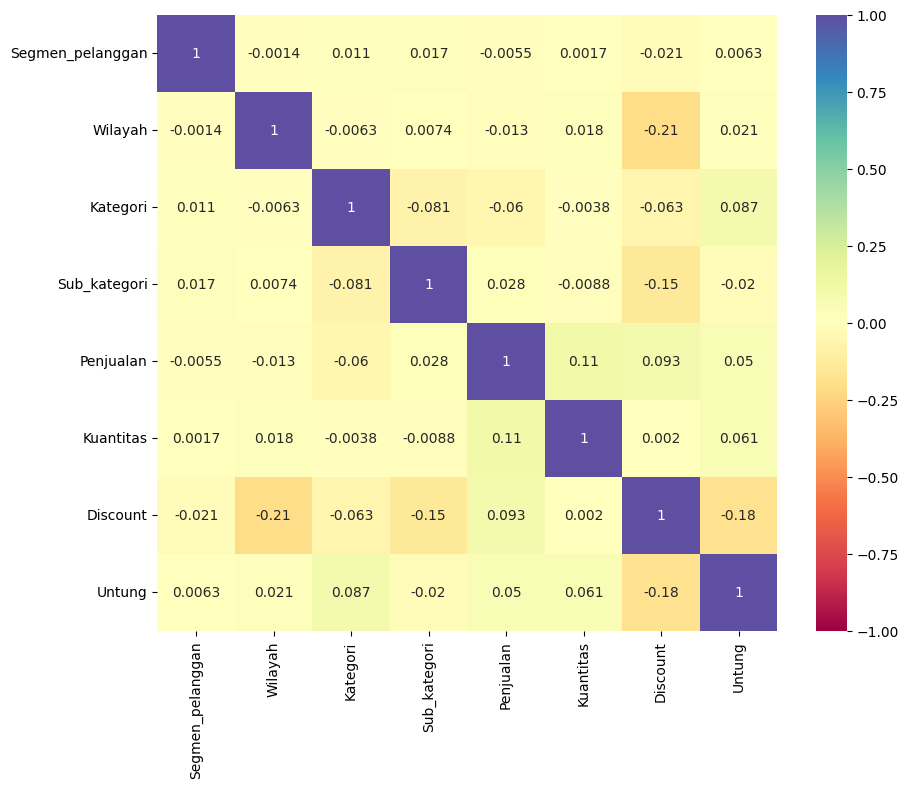

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [57]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df2.corr()["Penjualan"].sort_values()
korelasi

Kategori           -0.060030
Wilayah            -0.013037
Segmen_pelanggan   -0.005519
Sub_kategori        0.028454
Untung              0.050302
Discount            0.092941
Kuantitas           0.106562
Penjualan           1.000000
Name: Penjualan, dtype: float64

Diperoleh :
Nilai korelasi antara Penjualan dengan Kategori (-0,06), dengan Wilayah (-0,01), Segmen_pelanggan (-0,005), Sub_kategori (0,028), Untung (0,05), Discount (0.09), Kuantitas (0.1)



#### Scaling data

In [58]:
# Scale data
scaled_df2 = df2[['Penjualan', 'Untung']]
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(scaled_df2)

# mengganti nilai kolom ke DataFrame awal
df2[['Penjualan', 'Untung']] = scaled_df2

In [59]:
df2.head()

,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Penjualan,Kuantitas,Discount,Untung
0,0,2,0,4,-0.170477,2,0.00,0.133557
1,0,2,0,5,-0.082223,3,0.00,0.020799
2,1,3,1,10,-0.216923,2,0.00,-0.064449
3,0,2,0,16,17.761898,5,0.45,-0.319708
4,0,2,1,14,-0.177665,2,0.20,-0.089057


### MODELING

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [60]:
# Memisahkan data independen variabel dengan target
X = df2.drop(['Penjualan'], axis=1).values
y = df2['Penjualan'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [61]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  6593
Ukuran X test  2826
Ukuran y train  6593
Ukuran y test  2826


### Membangun model dengan package Statsmodels

In [62]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [63]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [64]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     24.45
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           4.05e-33
Time:                        07:08:17   Log-Likelihood:                -9592.4
No. Observations:                6593   AIC:                         1.920e+04
Df Residuals:                    6585   BIC:                         1.926e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2413      0.047     -5.152      0.0

In [65]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.02533037273819938
adjusted coefficient of determination: 0.0242942774624465
regression coefficients: [-0.24128529 -0.01412396  0.00803948 -0.09020099  0.00930159  0.04748533
  0.50647359  0.02887509]


In [66]:
# membuat list
list_columns = []

for i in df2.columns:
  if i != "Penjualan":
    list_columns.append(i)

In [67]:
list_columns

['Segmen_pelanggan',
 'Wilayah',
 'Kategori',
 'Sub_kategori',
 'Kuantitas',
 'Discount',
 'Untung']

In [68]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_Penjualan"] = y_test
df_statsmod["predict_Penjualan"] = prediction_1
df_statsmod.head()

,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Kuantitas,Discount,Untung,actual_Penjualan,predict_Penjualan
0,0.0,2.0,1.0,3.0,5.0,0.0,-0.093609,-0.218985,-0.052779
1,1.0,3.0,1.0,3.0,4.0,0.2,-0.053737,-0.169012,-0.003903
2,2.0,0.0,1.0,14.0,9.0,0.2,-0.065115,-0.092848,0.297271
3,2.0,3.0,0.0,9.0,2.0,0.0,-0.102373,-0.213667,-0.069686
4,1.0,0.0,1.0,3.0,1.0,0.0,-0.083672,-0.218221,-0.272636


#### Uji distrubusi residual

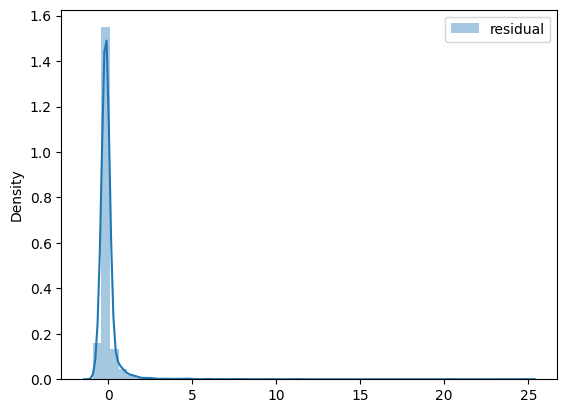

In [69]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_Penjualan'] - df_statsmod['predict_Penjualan']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [70]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.268, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, tetapi pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [71]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Kuantitas,Discount,Untung,actual_Penjualan,predict_Penjualan,residual
0,0.0,2.0,1.0,3.0,5.0,0.0,-0.093609,-0.218985,-0.052779,-0.166206
1,1.0,3.0,1.0,3.0,4.0,0.2,-0.053737,-0.169012,-0.003903,-0.165110
2,2.0,0.0,1.0,14.0,9.0,0.2,-0.065115,-0.092848,0.297271,-0.390119
3,2.0,3.0,0.0,9.0,2.0,0.0,-0.102373,-0.213667,-0.069686,-0.143981
4,1.0,0.0,1.0,3.0,1.0,0.0,-0.083672,-0.218221,-0.272636,0.054416


Plot data actual dan prediction <br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut : 

<function matplotlib.pyplot.show(close=None, block=None)>

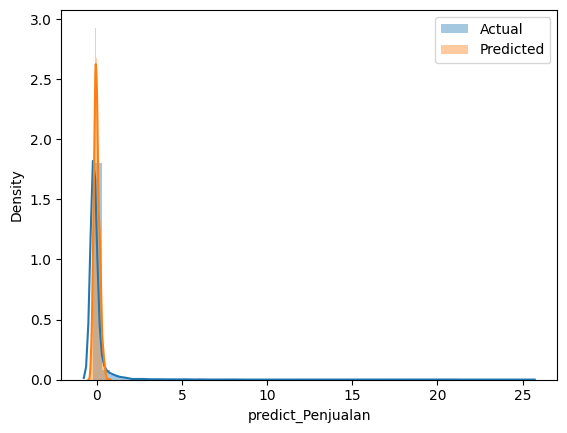

In [72]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_Penjualan'], label="Actual")
sns.distplot(df_statsmod['predict_Penjualan'], label="Predicted")
plt.legend()
plt.show

#### Uji autokorelasi

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.


In [73]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.976341142871053

#### Uji Homoskedasitas

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi


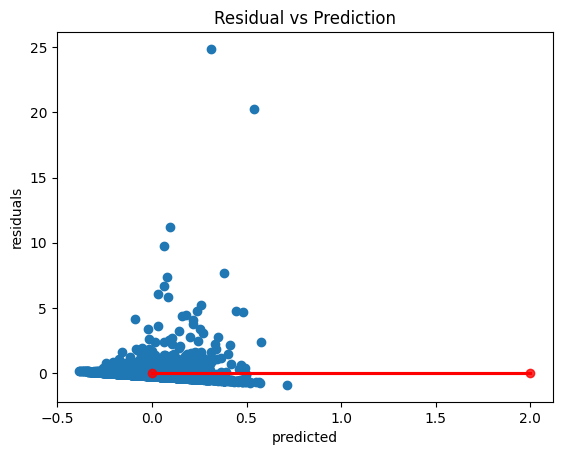

In [74]:
asm_homosk = plt.scatter(df_statsmod["predict_Penjualan"], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('residuals')
asm_homosk = sns.regplot(x = [0,2] , y= [0,0], color='red')
asm_homosk = plt.title('Residual vs Prediction')

### EVALUATION

In [75]:
# R square
print('R-square predicted training: ', 
      metrics.r2_score(df_statsmod['actual_Penjualan'], 
                       df_statsmod['predict_Penjualan']))

R-square predicted training:  0.03314839824732563


In [76]:
# MSE
print('MSE predicted training:',
metrics.mean_squared_error(df_statsmod['actual_Penjualan'],
                           df_statsmod['predict_Penjualan']))

MSE predicted training: 0.7350684647609645


#### Uji T (Parameter)

Uji Parameter bertujuan apakah variabel independen (X) memberi pengaruh yang signifikan terhadap variabel dependen (Y)

In [77]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6, t_test_X7 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)
print("T-test score X6: ", t_test_X6)
print("T-test score X7: ", t_test_X7)

T-test score const:  -5.152157364471272
T-test score X1:  -0.8458274154095405
T-test score X2:  0.7139070390495953
T-test score X3:  -4.436273334188731
T-test score X4:  3.632603523407093
T-test score X5:  8.402292641915585
T-test score X6:  7.915766760661935
T-test score X7:  2.3816940461517246


In [78]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5, p_value_X6, p_value_X7 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)
print("P-value X6: ", p_value_X6)
print("P-value X7: ", p_value_X7)

P-value const:  2.649942039242137e-07
P-value X1:  0.3976797625409314
P-value X2:  0.4753099667952214
P-value X3:  9.301896638483031e-06
P-value X4:  0.0002827107349475486
P-value X5:  5.311502806801542e-17
P-value X6:  2.863086122694994e-15
P-value X7:  0.017261448126375267


Diperoleh dari output di atas bahwa P-value variabel (X3, X4, X5, X6, X7) kurang dari 0,05,
sehingga Hypothesis null ditolak dan dapat disimpulkan, bahwa kelima tersebut
variabel independen (X) memberikan pengaruh secara signifikan pada
variabel dependen Penjualan (Y).

#### Uji F (Kelayakan Model)

Uji F memiliki tujuan untuk melihat apakah model regresi dari variabel X dan
Y yang dibentuk, layak digunakan atau tidak.

In [79]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  24.447918382596107
P-value :  4.0526268808098605e-33
Tolak H0


Dari output di atas, diperoleh p-value kurang dari 0,05 sehingga hypothesis
null ditolak dan dapat disimpulkan bahwa model regresi dari kelima variabel
independen dan variabel dependen Penjualan (Y) layak digunakan.

### LOAD AND PREDICT NEW DATA

In [80]:
df_statsmod.head(10)

,Segmen_pelanggan,Wilayah,Kategori,Sub_kategori,Kuantitas,Discount,Untung,actual_Penjualan,predict_Penjualan,residual
0,0.0,2.0,1.0,3.0,5.0,0.0,-0.093609,-0.218985,-0.052779,-0.166206
1,1.0,3.0,1.0,3.0,4.0,0.2,-0.053737,-0.169012,-0.003903,-0.165110
2,2.0,0.0,1.0,14.0,9.0,0.2,-0.065115,-0.092848,0.297271,-0.390119
3,2.0,3.0,0.0,9.0,2.0,0.0,-0.102373,-0.213667,-0.069686,-0.143981
4,1.0,0.0,1.0,3.0,1.0,0.0,-0.083672,-0.218221,-0.272636,0.054416
5,0.0,2.0,2.0,0.0,2.0,0.0,-0.017864,-0.206152,-0.311153,0.105002
6,1.0,1.0,1.0,1.0,9.0,0.0,0.458890,-0.152946,0.112349,-0.265295
7,2.0,3.0,2.0,13.0,3.0,0.2,-0.098192,-0.084511,-0.063981,-0.020530
8,1.0,1.0,1.0,3.0,4.0,0.7,-0.261101,-0.148146,0.227268,-0.375414
9,2.0,1.0,2.0,0.0,1.0,0.2,-0.103195,-0.219533,-0.296095,0.076562


Text(0.5, 1.0, 'Actual vs Prediction')

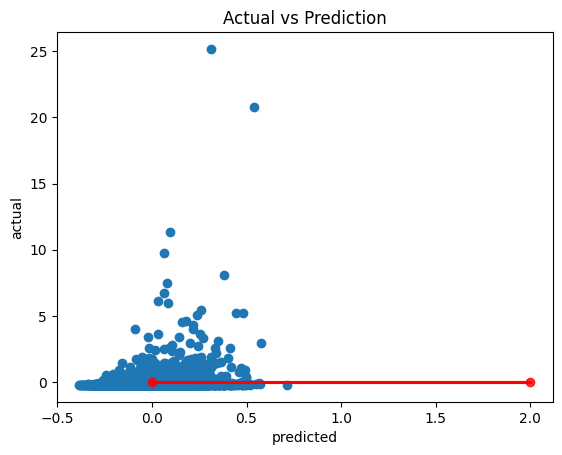

In [81]:
# Membandingkan antara nilai actual dan predict dari Y
# Memvisualisasikan perbandingan nilai actual dan predict dari Y

plt.scatter(df_statsmod["predict_Penjualan"], df_statsmod["actual_Penjualan"])
plt.xlabel('predicted')
plt.ylabel('actual')
sns.regplot(x = [0,2] , y= [0,0], color='red')
plt.title('Actual vs Prediction')


### KESIMPULAN/SARAN


### KESIMPULAN

1.   Keuntungan tertinggi didapat pada kategori Technology, dan Penjualan tertinggi didapat pada kategori Furniture. Sub_kategori produk teratas berdasarkan Penjualan yaitu : Bookcases, Copiers, Tables. Sub_kategori produk terbawah berdasarkan Penjualan yaitu : Labels, Fasteners
2.   Pembeli kategori Office Supplies paling banyak di wilayah West. Pembeli sub_kategori produk Bookcases, Copiers, Tables, Labels, fasteners paling banyak di wilayah West.
3. Segmentasi pelanggan Consumer, Corporate, Home Office yang memiliki jumlah terbanyak membeli produk di wilayah West
4. Berdasarkan heatmap korelasi didapat variabel dengan korelasi tertinggi terhadap Penjualan yaitu : Sub_kategori, Untung, Discount dan Kuantitas.
Sedangkan berdasarkan model regresi yang dibangun variabel yang berpengaruh dominan terhadap Penjualan yaitu : Kategori, Sub_kategori, Kuantitas, Discount, Untung
5. Model yang telah dibangun memiliki score R-squared yang kecil 2,5% yang berarti variabel-variabel independen model yang telah dibangun belum mampu menjelaskan variabel dependen dan faktor apa saja yang mempengaruhi penjualan sebesar 2,5%. Hal tersebut bisa disebabkan karena data masih banyak terdapat outlier


### SARAN

1. Berdasarkan besarnya Penjualan dari tiap Kategori maupun Sub_kategori produk Superstore mengetahui produk apa saja yang memiliki nilai jual tinggi dan mendapatkan keuntungan yang tinggi
2. Superstore juga mengetahui bahwa segmen pelanggan tertinggi di wilayah West sehingga dapat meningkatkan kuantitas produk di wilayah tersebut
3. Superstore dapat memberikan discount produk untuk meningkatkan penjualan
